In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import torch
from hepps_dataset import HePPSDataset  # adjust the import based on your module structure

# Define file paths and parameters (make sure these paths are correct)
file_identifiers = [
    "rest",
    "caffeine",
    "deep_breath",
    "hold_breath_1",
    "hold_breath_2",
    "exercise"
]

# Instantiate the dataset using your full segment extraction mode
dataset = HePPSDataset(file_identifiers=file_identifiers, 
                       segment_offset=0,
                       target_length=1024,
                       filter_cutoff_wrist=[0.5, 20], 
                       filter_cutoff_finger=[0.2, 500],
                       remove_after_resample=10)

Loaded ./data/finger_vs_wrist0403_rest.txt with shape (5290000, 3)
File rest: Detected 75 peaks and 75 troughs.
Loaded ./data/finger_vs_wrist0403_caffeine.txt with shape (7569000, 3)
File caffeine: Detected 98 peaks and 98 troughs.
Loaded ./data/finger_vs_wrist0403_deep_breath.txt with shape (6910000, 3)
File deep_breath: Detected 94 peaks and 93 troughs.
Loaded ./data/finger_vs_wrist0403_hold_breath_1.txt with shape (3120000, 3)
File hold_breath_1: Detected 36 peaks and 36 troughs.
Loaded ./data/finger_vs_wrist0403_hold_breath_2.txt with shape (2770000, 3)
File hold_breath_2: Detected 30 peaks and 30 troughs.
Loaded ./data/finger_vs_wrist0403_exercise.txt with shape (6500000, 3)
File exercise: Detected 112 peaks and 112 troughs.
Outlier removal: retained 382 out of 438 segments.


In [30]:
len(dataset.segments)

382

(1024, 2)


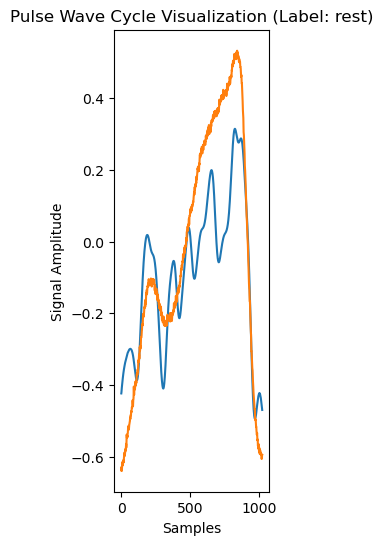

In [31]:
# Select an arbitrary cycle; for example, pick the first segment.
sample, label = dataset[10]
sample_np = sample.numpy()
print(sample_np.shape)

# Each sample is a 2D array with shape (L, 2), where:
#   - The first column is wrist data.
#   - The second column is fingertip data.

plt.figure(figsize=(2, 6))
plt.plot(sample_np[:, 0], label="Wrist")
plt.plot(sample_np[:, 1], label="Finger")

# plt.plot(dataset.wrist, label="Wrist")
# plt.plot(dataset.finger, label="Finger")
# plt.plot(dataset.troughs, dataset.finger[dataset.troughs], label="Troughs", ls="None", marker="o")
# plt.plot(dataset.peaks, dataset.finger[dataset.peaks], label="Peaks", ls="None", marker="o")
# plt.xlim(79900,80001)
# plt.ylim(-0.002,0.002)

plt.title(f"Pulse Wave Cycle Visualization (Label: {label})")
plt.xlabel("Samples")
plt.ylabel("Signal Amplitude")
# plt.legend()
plt.show()


In [4]:
from hepps_model import HePPSRNN
import torch

batch_size = 8
seq_length = 80000
input_size = 2

dummy_input = torch.randn(batch_size, seq_length, input_size)
model = HePPSRNN(input_size=input_size, hidden_size=64, num_layers=2, num_classes=5, dropout=0.2, bidirectional=True)

output = model(dummy_input)
print("Output logits shape:", output.shape)


Output logits shape: torch.Size([8, 5])
